In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lmbh

Create a biased media (modelled as a coin) simulation over a complete graph (as illustration) with $n = 5$ agents. 

All agents have uniform random generated prior parameters with means between $[0, 1]$ and standard deviations between $[0.2, 0.8]$.  These are the default values and are configurable with `init_mean_range` and `init_sd_range` in `UniformRandomPriorParams`.

We make the last agent (n-1, as they are 0-indexed) a partisan, with initial belief that is singular-peaked at 0.3 (`partisan_mean` parameter), with no belief elsewhere. Their belief does not update over the simulation.

The coins are generated with probability of heads ($\theta_0$) as 0.6, with a maximum of 10,000 coins generated over the simulation.  These can be specified by providing `bias` and `max_steps` parameters respectively to `RandomCoinParams`.

Here we only configure a simulation, it does not yet run the simulation.

In [2]:
n = 5

rng = np.random.default_rng(seed=42)
sim = lmbh.Simulation(
    graph = lmbh.GraphGenerators.complete_graph_of_allies(n),
    prior_params = lmbh.UniformRandomPriorParams(rng=rng, n=n, partisans=[n-1]),
    coin_params = lmbh.RandomCoinParams(rng=rng),
)

The simulation will be run and stored by obtaining the `sim.analyse` or `sim.results` objects.  So the next line will run the simulation.

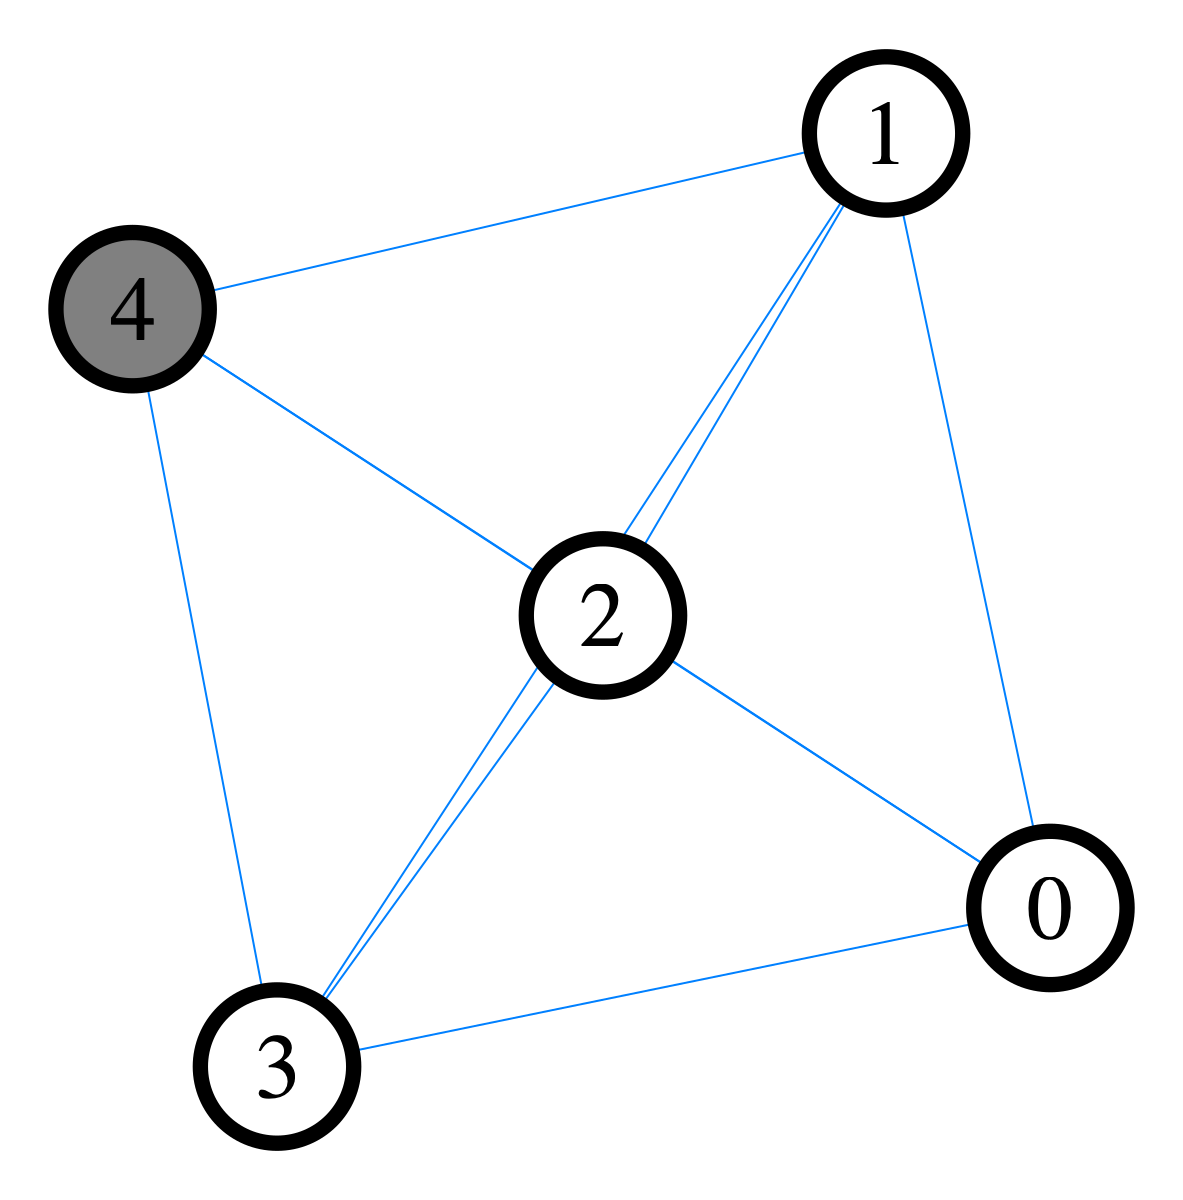

In [3]:
sim.analyse.show_graph()

Plot the mean distribution for each agent.

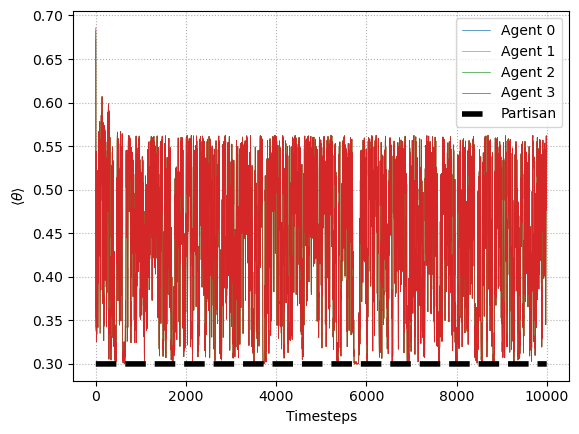

In [4]:
sim.analyse.plot_all_mean()

That is a bit difficult to see, so let's zoom into to the first 10 steps.  We see that the agents reach consensus.

(0.0, 10.0)

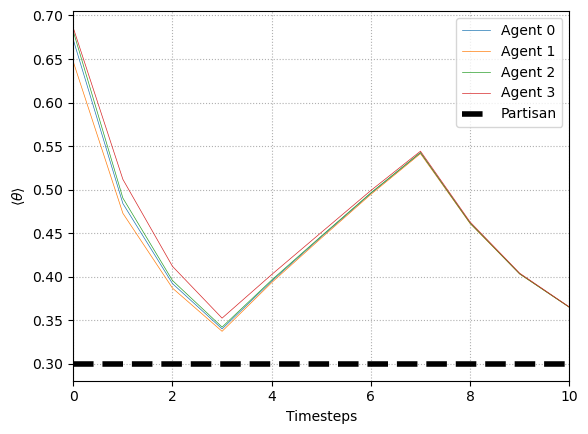

In [5]:
sim.analyse.plot_all_mean()
plt.xlim(0, 10)

For non-complete graphs, they do not reach consensus.  Here we try a Barabási-Albert graph with n=5 (as before), but attachment parameter m = 1.

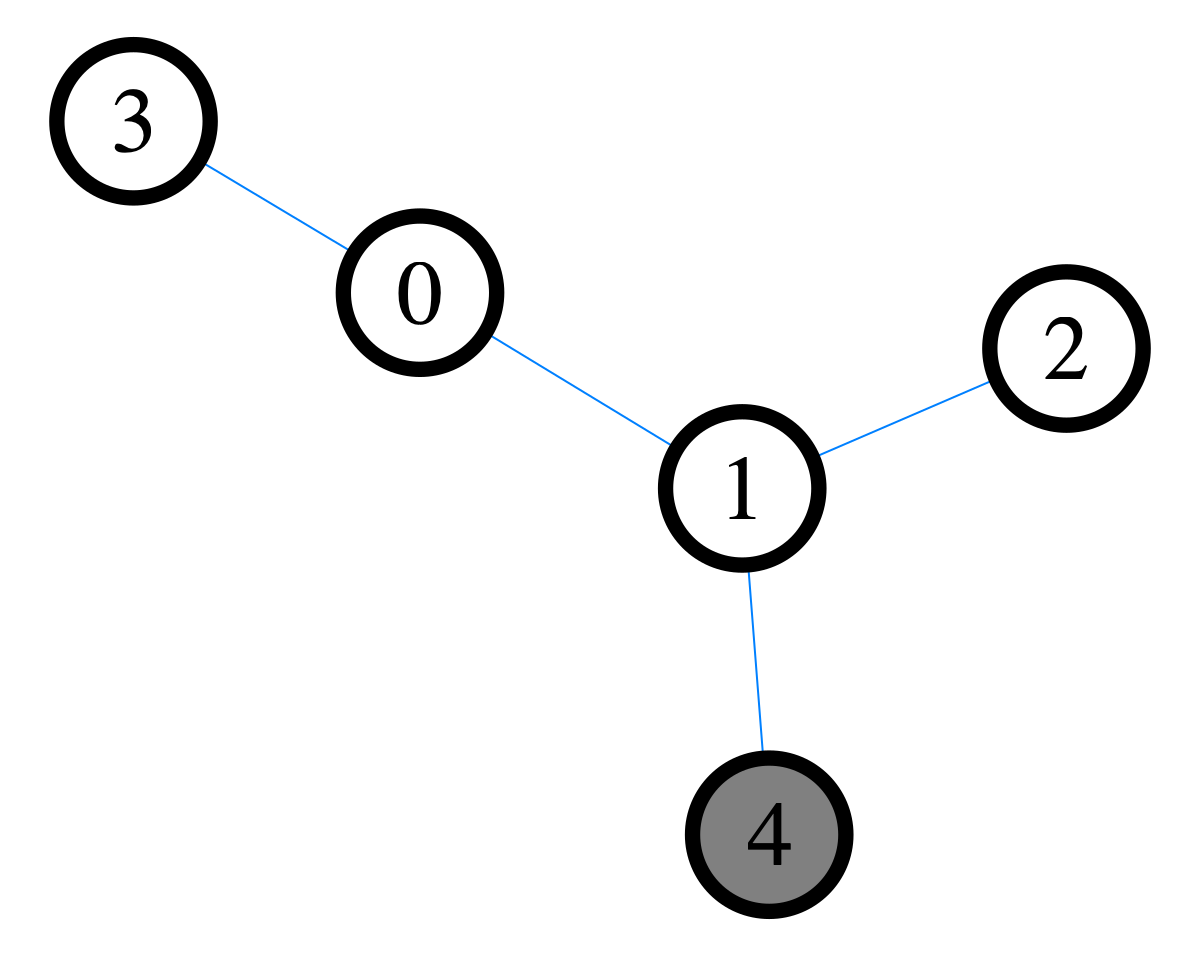

In [6]:
ba_sim = lmbh.Simulation(
    # We can't provide an rng for the Barabási-Albert graph generator, instead we could pass an adjancy matrix.
    graph = lmbh.GraphGenerators.ba_graph_of_allies(n, m=1),
    prior_params = lmbh.UniformRandomPriorParams(rng=rng, n=n, partisans=[n-1]),
    coin_params = lmbh.RandomCoinParams(rng=rng),
)
ba_sim.analyse.show_graph()

This time the agents do not reach consensus.

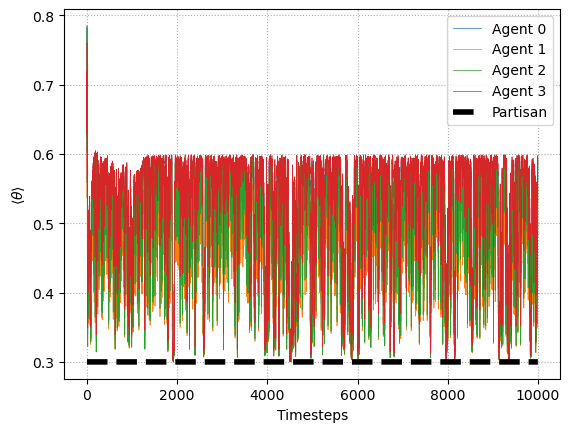

In [7]:
ba_sim.analyse.plot_all_mean()

(9000.0, 10000.0)

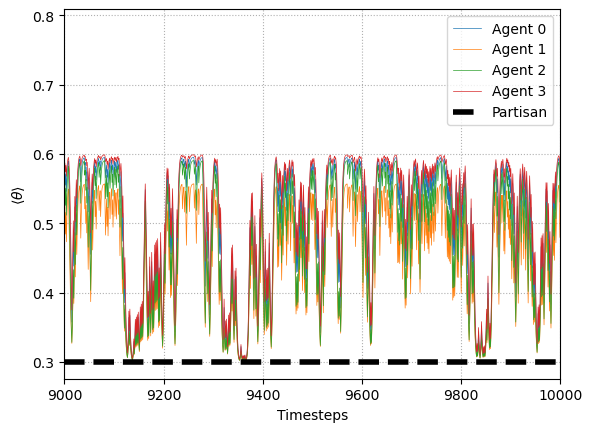

In [8]:
ba_sim.analyse.plot_all_mean()
plt.xlim(9000, 10000)

We can also inspect a snapshot of the PDF of each agent at a given time step.  Here we plot time step number 1000 (0-indexed).

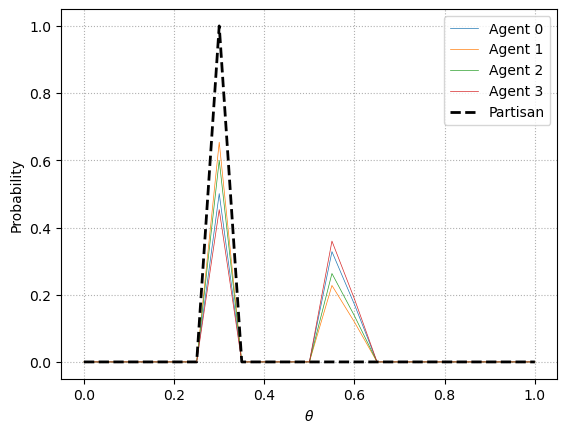

In [9]:
ba_sim.analyse.plot_distr(step=1000)

We can also explore the PDFs interactively.  To reduce lag we only observe every 10th step.

In [10]:
ba_sim.analyse.plotly_distr(steps=list(range(0, 10000, 10)))

In [11]:
ba_sim.analyse.gif_distr('workshop_onepartisan.gif', last_step=1000)

![](workshop_onepartisan.gif "segment")

We demonstrate a complete graph with n=100 agents.

In [12]:
n = 100
rng = np.random.default_rng(seed=42)
big_sim = lmbh.Simulation(
    graph = lmbh.GraphGenerators.complete_graph_of_allies(n = n),
    prior_params = lmbh.UniformRandomPriorParams(rng=rng, n=n, partisans=[n-1]),
    coin_params = lmbh.RandomCoinParams(rng=rng),
)
big_sim.analyse.gif_distr('workshop_onepartisan_100.gif', last_step=1000, legend=False)

![](workshop_onepartisan_100.gif "segment")